# Exploratory Analysis

In [1]:
# Essential imports and constants
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
import requests, time, datetime, re, math

# if executed locally
TEST = 'Rationale/test.csv'
TICKER = 'Metadata/ticker.txt'
FORM4_LINK = 'Database/form4_data.csv'
FORM4_LINK_XML = 'Database/form4_data_xml.csv'
FORM4_LINK_HTM = 'Database/form4_data_htm.csv'
FORM4_LINK_TXT = 'Database/form4_data_txt.csv'
FORM4_DETAIL = 'Database/form4_detail.csv' 
FORM4_DETAIL_XML = 'Database/form4_detail_xml.csv'
FORM4_DETAIL_CLEAN = 'Database/form4_detail_clean.csv'
FORM4_DETAIL_HTM = 'Database/form4_detail_htm.csv'
FORM4_DETAIL_TXT = 'Database/form4_detail_txt.csv'
FORM4_TX = 'Database/form4_tx.csv'
FORM4_TX_XML = 'Database/form4_tx_xml.csv'
FORM4_TX_CLEAN = 'Database/form4_tx_clean.csv'
FORM4_TX_HTM = 'Database/form4_tx_htm.csv'
FORM4_TX_TXT = 'Database/form4_tx_txt.csv'
META_DJ30 = 'Metadata/ticker_dj30.txt' 
META_SP500 = 'Metadata/ticker_sp500.txt'
META_SP500_RAN = 'Metadata/ticker_sp500_ran.txt'
CODE_EXTRACT = 'DataProcessingPipelining/extract_file.sh'
CODE_EXTRACT_ONE = 'DataProcessingPipelining/extract_1_quarter.sh'
CODE_EXTRACT_NOPAR = 'DataProcessingPipelining/extract_noPAR.sh'

In [ ]:
# if executed on Google Colab
from google.colab import drive
drive.mount('/content/drive')

BASE_DRIVE_LINK = '/content/drive/My Drive/URECA/'
FORM4_LINK = BASE_DRIVE_LINK + 'Database/form4_data.csv'
FORM4_LINK_XML = BASE_DRIVE_LINK + 'Database/form4_data_xml.csv'
FORM4_LINK_HTM = BASE_DRIVE_LINK + 'Database/form4_data_htm.csv'
FORM4_LINK_TXT = BASE_DRIVE_LINK + 'Database/form4_data_txt.csv'
FORM4_DETAIL = BASE_DRIVE_LINK + 'Database/form4_detail.csv'
FORM4_DETAIL_XML = BASE_DRIVE_LINK + 'Database/form4_detail_xml.csv'
FORM4_DETAIL_HTM = BASE_DRIVE_LINK + 'Database/form4_detail_htm.csv'
FORM4_DETAIL_TXT = BASE_DRIVE_LINK + 'Database/form4_detail_txt.csv'
FORM4_TX = BASE_DRIVE_LINK + 'Database/form4_tx.csv'
FORM4_TX_XML = BASE_DRIVE_LINK + 'Database/form4_tx_xml.csv'
FORM4_TX_HTM = BASE_DRIVE_LINK + 'Database/form4_tx_htm.csv'
FORM4_TX_TXT = BASE_DRIVE_LINK + 'Database/form4_tx_txt.csv'
META_DJ30 = BASE_DRIVE_LINK + 'Metadata/ticker_dj30.txt' 
META_SP500 = BASE_DRIVE_LINK + 'Metadata/ticker_sp500.txt'
META_SP500_RAN = BASE_DRIVE_LINK + 'Metadata/ticker_sp500_ran.txt'
TEST = BASE_DRIVE_LINK + 'Rationale/test.csv'
TICKER = BASE_DRIVE_LINK + 'Metadata/ticker.txt'
CODE_EXTRACT = BASE_DRIVE_LINK + 'DataProcessingPipelining/extract_file.sh'
CODE_EXTRACT_ONE = BASE_DRIVE_LINK + 'DataProcessingPipelining/extract_1_quarter.sh'
CODE_EXTRACT_NOPAR = BASE_DRIVE_LINK + 'DataProcessingPipelining/extract_noPAR.sh'

In [116]:
detail_data = pd.read_csv(FORM4_DETAIL_XML, sep='|', parse_dates = ['Date'], index_col = 'Date')
tx_data = pd.read_csv(FORM4_TX_XML, sep = '|', parse_dates = ['date'], index_col = 'date')
display(detail_data.head())
display(tx_data.head())

,Company,CIK,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,is_director,is_officer,is_beneficial_owner,is_other
Date,,,,,,,,,,,,,
2003-07-25,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000036,4.0,Grenz M Kay,1196474.0,SENIOR VICE PRESIDENT HR,0.0,1.0,0.0,0.0
2003-07-11,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000031,4.0,Palensky Fred J,1197743.0,EXEC VP SFTY SEC & PROT SVCS,0.0,1.0,0.0,0.0
2003-07-25,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000037,4.0,Mcnerney W James Jr,1182055.0,CHAIRMAN OF THE BOARD & CEO,1.0,1.0,0.0,0.0
2003-07-25,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000038,4.0,Nozari M S,1197740.0,EXEC VP CONSUMER &,0.0,1.0,0.0,0.0
2003-07-11,3M CO,66740,https://www.sec.gov/Archives/edgar/data/66740/...,MMM,6674003000030,4.0,Belschner Ronald R,1196469.0,SENIOR VICE PRESIDENT ENGRG,0.0,1.0,0.0,0.0


,accession_no,CIK,stock_type,code,acquired,shares_exchanged,net_shares_owned,stock_price,direct_ownership
date,,,,,,,,,
2003-08-06,6674003000048,66740,Common Stock,M,A,1052.0,1052.0,95.000,D
2003-08-06,6674003000049,66740,Common Stock,M,A,2560.0,15175.0,63.035,D
2003-08-06,6674003000049,66740,Common Stock,F,D,1163.0,14012.0,138.660,D
2003-08-06,6674003000049,66740,Common Stock,F,D,456.0,13556.0,138.660,D
2003-08-06,6674003000049,66740,Common Stock,M,A,1118.0,14674.0,90.150,D


# Cleaning and Inspecting Data
Inspection of missing values is performed as some Form 4 files are not filled in appropriately and completely.
## Detail Data Source
Inspect the missing values: 

In [172]:
detail_data.isnull().sum(axis = 0)

Company                    0
CIK                        0
Link                       0
trad_symbol                0
accession_no               0
form                       0
reporter_name              0
reporter_cik               0
reporter_title         67833
is_director                0
is_officer                 0
is_beneficial_owner        0
is_other                   0
is_ceo                     0
is_cfo                     0
dtype: int64

Cleaning operations
1. [Trim strings](https://stackoverflow.com/questions/5197959/how-do-i-remove-hex-values-in-a-python-string-with-regular-expressions): when data are scraped, some company names have trailing backspaces '\x08', which may cause duplication of companies. This process removes the backspaces
2. Filling role codes: for `is_director`, `is_officer` and two other role codes, there are many null values. This research assumes that null values indicate that the reporter does not have the role
3. Standardising company names: some company names are written in different arrangements, spelled wrongly, or have extensions
4. Standardising and cleaning tickers/ trading symbols: a CIK can have multiple tickers, and the data of some companies other than the 150 companies in question are also included. The trading symbols are standardised for each company, and the additional CIKs are removed
3. Standardising company names: for the same CIK, only one company name is recorded into the cleaned data. Such differences occur due to spelling mistakes, capitalisation and word arrangement

In [173]:
# Trim the company names
def trim_company(record):
    record['Company'] = re.sub(r'[^\w\s]*', '', record['Company'])
    return record

In [174]:
detail_data = detail_data.apply(trim_company, axis = 1);

### Trading symbols

In [175]:
detail_data.loc[detail_data['trad_symbol'].isnull(), ['Company', 'CIK']].drop_duplicates()

,Company,CIK
Date,,


BlackRock, the investment company with CIK 1364742, has trading symbol 'BLK'. Add the trading symbol to it

In [176]:
detail_data.loc[detail_data['trad_symbol'].isnull(), 'trad_symbol'] = 'BLK'

### Role codes

In [177]:
role_codes = ['is_director', 'is_officer', 'is_beneficial_owner', 'is_other']
detail_data[role_codes] = detail_data.loc[:,role_codes].fillna(0)

In [178]:
detail_data.isnull().sum(axis = 0)

Company                    0
CIK                        0
Link                       0
trad_symbol                0
accession_no               0
form                       0
reporter_name              0
reporter_cik               0
reporter_title         67833
is_director                0
is_officer                 0
is_beneficial_owner        0
is_other                   0
is_ceo                     0
is_cfo                     0
dtype: int64

### Companies

As there is no strict checking on the filing format, the fields require additional formatting. For example, the `Company` field filled in by insiders differ by spelling, capitalisation and arrangement.

In [179]:
companies = detail_data['Company'].unique()
companies.sort()
print(f"Companies from `companies` field: {len(companies)}")
print(f"Companies from `CIK` field: {len(detail_data['CIK'].unique())}")

Companies from `companies` field: 150
Companies from `CIK` field: 150


In [180]:
# Different in spelling
detail_data.loc[detail_data['Company'].str.lower().str.find('hartford') != -1, ['Company', 'CIK']].drop_duplicates()

,Company,CIK
Date,,
2003-11-10,Hartford Financial Services Group Incde,874766


In [181]:
# Different in capitalisation
detail_data.loc[detail_data['Company'].str.lower().str.find('tesla') != -1, ['Company', 'CIK']].drop_duplicates()

,Company,CIK
Date,,
2010-07-02,Tesla Motors Inc,1318605


In [182]:
# Different in arrangement
detail_data.loc[detail_data['Company'].str.find('ARTHUR') != -1, ['Company', 'CIK']].drop_duplicates()

,Company,CIK
Date,,


In [183]:
def company_clean(df):
    df.Company = df.Company.str.title()
    standard_name = df.Company.iloc[0]
    df.Company = standard_name
    return df.Company

In [184]:
detail_data = detail_data.reset_index()
clean_company = detail_data.groupby('CIK').apply(company_clean).reset_index(level = 1, drop = True).drop_duplicates()
detail_data.loc[:,'Company'] = clean_company[detail_data.CIK].values
detail_data = detail_data.set_index('Date')
detail_data.head()
detail_data.head()

,Company,CIK,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,is_director,is_officer,is_beneficial_owner,is_other,is_ceo,is_cfo
Date,,,,,,,,,,,,,,,
2003-05-05,Amazon Com Inc,1018724,https://www.sec.gov/Archives/edgar/data/101872...,AMZN,121783103000028,4,Bezos Jeffrey P,1043298,"Chairman of the Board, CEO & P",True,True,True,False,True,False
2003-05-05,Alcoa Inc,4281,https://www.sec.gov/Archives/edgar/data/4281/0...,HWM,112728503000009,4,Belda Alain J P,1127285,Chairman & Chief Exec. Officer,True,True,False,False,False,False
2003-05-06,Hewlett Packard Co,47217,https://www.sec.gov/Archives/edgar/data/47217/...,HPQ,100547703000346,4,Condit Philip M,1182050,NaN,True,False,False,False,False,False
2003-05-06,Sysco Corp,96021,https://www.sec.gov/Archives/edgar/data/96021/...,SYY,9602103000044,4,Nichols Michael C,1098933,"VP,Gen Counsel,Corp Secretary",False,True,False,False,False,False
2003-05-06,Sysco Corp,96021,https://www.sec.gov/Archives/edgar/data/96021/...,SYY,9602103000046,4,Graham James C,1128601,"Sr VP, Foodservice Operations",False,True,False,False,False,False


In [185]:
companies = detail_data['Company'].unique()
companies.sort()
print(f"Companies from `companies` field: {len(companies)}")
print(f"Companies from `CIK` field: {len(detail_data['CIK'].unique())}")

Companies from `companies` field: 150
Companies from `CIK` field: 150


### CIK
#### Standardising Tickers
Each CIK may have more than one trading symbol. This may be confusing, and so cleaning of trading symbol is done

In [186]:
# read original CIKs used 
with open(META_SP500_RAN, 'r') as f:
    origin_cik = np.array([int(x) for x in f.read().split('|')])

# read ticker table
ticker = pd.read_table(TICKER, names = ['Ticker', 'CIK']).set_index('Ticker')
ticker.head()

,CIK
Ticker,
aapl,320193
msft,789019
amzn,1018724
goog,1652044
tcehy,1293451


In [187]:
ticker[ticker.index.duplicated()]

,CIK
Ticker,
orcl,1341439


Ticker orcl is duplicated. A quick check on the 150 CIKs inspected

In [188]:
cik, count = np.unique(origin_cik, return_counts = True)
cik[count > 1]

array([], dtype=int32)

In [189]:
ticker[ticker.CIK == 1341439]

,CIK
Ticker,
orcl,1341439
orcl,1341439


All CIKs are unique. Thus, the data collected indeed contains exactly 150 unique firms

In [190]:
print(f"Original number of CIKs under research: {len(origin_cik)}")
print(f"Number of tickers retrieved: {len(ticker[ticker.isin(origin_cik).CIK.tolist()].index)}")

Original number of CIKs under research: 150
Number of tickers retrieved: 195


In [191]:
ticker[ticker.isin(origin_cik).CIK.tolist()].index.value_counts()

orcl      2
aap       1
bkng      1
dgx       1
bio       1
         ..
psa-pj    1
kmb       1
ups       1
adm       1
peak      1
Name: Ticker, Length: 194, dtype: int64

150 CIKs yielded 195 ticker symbols. Since orcl is repeated in the 'Ticker' file, actually 194 tickers are used. This indicates that a company might have more than 1 CIK

In [192]:
res_ticker = ticker.reset_index()
count_ticker = res_ticker[res_ticker.CIK.isin(origin_cik)].groupby('CIK').count().sort_values('Ticker', ascending = False)
count_ticker = count_ticker[count_ticker['Ticker'] > 1]
count_ticker.head()

,Ticker
CIK,
1393311,15
36104,7
92122,6
936340,5
899051,5


In [193]:
dup_ticker_to_cik = res_ticker[res_ticker.CIK.isin(count_ticker.index)].sort_values(by = ['CIK', 'Ticker'])
dup_ticker_to_cik.head()

,Ticker,CIK
699,bio,12208
8662,bio-b,12208
190,usb,36104
10787,usb-pa,36104
8465,usb-ph,36104


From the exploration, one CIK is mapped to multiple tickers. To clearly analyse the 150 companies, each CIK shall only have one ticker. Cleaning is done by choosing one ticker for one CIK

In [194]:
unique_ticker = ticker.reset_index().drop_duplicates('CIK', keep = 'first').set_index('CIK')
unique_ticker.Ticker = unique_ticker.Ticker.str.upper()
unique_ticker.head()

,Ticker
CIK,
320193,AAPL
789019,MSFT
1018724,AMZN
1652044,GOOG
1293451,TCEHY


In [195]:
def cik_clean(df):
    try:
        df.trad_symbol = unique_ticker.loc[df['CIK'] == unique_ticker.index, 'Ticker'].values[0]
    except IndexError:
        print(df['CIK'], df['trad_symbol'])
    
    return df
detail_data = detail_data.apply(cik_clean, axis = 1)
detail_data.head()

,Company,CIK,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,is_director,is_officer,is_beneficial_owner,is_other,is_ceo,is_cfo
Date,,,,,,,,,,,,,,,
2003-05-05,Amazon Com Inc,1018724,https://www.sec.gov/Archives/edgar/data/101872...,AMZN,121783103000028,4,Bezos Jeffrey P,1043298,"Chairman of the Board, CEO & P",True,True,True,False,True,False
2003-05-05,Alcoa Inc,4281,https://www.sec.gov/Archives/edgar/data/4281/0...,HWM,112728503000009,4,Belda Alain J P,1127285,Chairman & Chief Exec. Officer,True,True,False,False,False,False
2003-05-06,Hewlett Packard Co,47217,https://www.sec.gov/Archives/edgar/data/47217/...,HPQ,100547703000346,4,Condit Philip M,1182050,NaN,True,False,False,False,False,False
2003-05-06,Sysco Corp,96021,https://www.sec.gov/Archives/edgar/data/96021/...,SYY,9602103000044,4,Nichols Michael C,1098933,"VP,Gen Counsel,Corp Secretary",False,True,False,False,False,False
2003-05-06,Sysco Corp,96021,https://www.sec.gov/Archives/edgar/data/96021/...,SYY,9602103000046,4,Graham James C,1128601,"Sr VP, Foodservice Operations",False,True,False,False,False,False


#### Remove new firms
Notice that some CIKs are not found and are printed out for inspection. These firms could be linked to the 150 companies, or they could just be scraped accidentally during the webscraping process. If they are accidentally scraped, for data consistency reasons, they will be removed.

In [196]:
new_firm = pd.DataFrame({'Ticker': ['CNNX', 'WATT', 'CNNX', 'MXIM', 'ATHX'], 'CIK': [1188020, 1366294, 1610418, 1201627, 1503224]})

In [197]:
collected_cik = detail_data.CIK.unique()
new_cik = np.setxor1d(origin_cik, collected_cik)
new_firm_from_cik = ticker[ticker.isin(new_cik).CIK.tolist()].reset_index()
new_firm = new_firm.append(new_firm_from_cik, ignore_index = True)
new_firm.Ticker = new_firm.Ticker.str.upper()
new_firm

,Ticker,CIK
0,CNNX,1188020
1,WATT,1366294
2,CNNX,1610418
3,MXIM,1201627
4,ATHX,1503224


In [198]:
# Verify if these companies are within the inspection scope
origin_ticker = ticker[ticker.CIK.isin(origin_cik)]
print(f"Ticker Belongs to 150 companies: {len(origin_ticker[origin_ticker.index.isin(new_firm.Ticker.tolist())])}")
print(f"CIK Belongs to 150 companies: {len(origin_ticker[origin_ticker.CIK.isin(new_firm.CIK.tolist())])}")

Ticker Belongs to 150 companies: 0
CIK Belongs to 150 companies: 0


In [199]:
detail_data = detail_data.reset_index()
mask = detail_data.index[detail_data.CIK.isin(new_firm.Ticker.tolist()) | detail_data.CIK.isin(new_firm.CIK.tolist())]
detail_data.drop(mask, inplace = True)
detail_data = detail_data.set_index(['Date'])
detail_data.head()

,Company,CIK,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,is_director,is_officer,is_beneficial_owner,is_other,is_ceo,is_cfo
Date,,,,,,,,,,,,,,,
2003-05-05,Amazon Com Inc,1018724,https://www.sec.gov/Archives/edgar/data/101872...,AMZN,121783103000028,4,Bezos Jeffrey P,1043298,"Chairman of the Board, CEO & P",True,True,True,False,True,False
2003-05-05,Alcoa Inc,4281,https://www.sec.gov/Archives/edgar/data/4281/0...,HWM,112728503000009,4,Belda Alain J P,1127285,Chairman & Chief Exec. Officer,True,True,False,False,False,False
2003-05-06,Hewlett Packard Co,47217,https://www.sec.gov/Archives/edgar/data/47217/...,HPQ,100547703000346,4,Condit Philip M,1182050,NaN,True,False,False,False,False,False
2003-05-06,Sysco Corp,96021,https://www.sec.gov/Archives/edgar/data/96021/...,SYY,9602103000044,4,Nichols Michael C,1098933,"VP,Gen Counsel,Corp Secretary",False,True,False,False,False,False
2003-05-06,Sysco Corp,96021,https://www.sec.gov/Archives/edgar/data/96021/...,SYY,9602103000046,4,Graham James C,1128601,"Sr VP, Foodservice Operations",False,True,False,False,False,False


In [200]:
print(f"Number of CIKs: {len(detail_data.CIK.unique())}")

Number of CIKs: 150


### Standardising Column Data Types and Sort

In [201]:
detail_data = detail_data.astype({'form': int, 'reporter_cik': int, 'is_director': bool, 'is_officer': bool, 
                           'is_beneficial_owner': bool, 'is_other': bool, 'reporter_title': str})
detail_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174378 entries, 2003-05-05 to 2020-12-31
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Company              174378 non-null  object
 1   CIK                  174378 non-null  int64 
 2   Link                 174378 non-null  object
 3   trad_symbol          174378 non-null  object
 4   accession_no         174378 non-null  int64 
 5   form                 174378 non-null  int32 
 6   reporter_name        174378 non-null  object
 7   reporter_cik         174378 non-null  int32 
 8   reporter_title       174378 non-null  object
 9   is_director          174378 non-null  bool  
 10  is_officer           174378 non-null  bool  
 11  is_beneficial_owner  174378 non-null  bool  
 12  is_other             174378 non-null  bool  
 13  is_ceo               174378 non-null  bool  
 14  is_cfo               174378 non-null  bool  
dtypes: bool(6), int32(

In [202]:
detail_data = detail_data.sort_index()

### Extracting positions

In [203]:
detail_data.is_other.value_counts()

False    170506
True       3872
Name: is_other, dtype: int64

In [204]:
detail_data.loc[detail_data.is_other == True, 'reporter_title'].value_counts().head()

nan                              3246
VP Legal Affairs, Gen Counsel      61
President & CEO                    43
Executive Vice President           42
SR. VICE PRESIDENT -               34
Name: reporter_title, dtype: int64

In [205]:
detail_data.loc[detail_data.is_officer == True, 'reporter_title'].value_counts().head()

Executive Vice President    8098
Senior Vice President       6363
Chairman and CEO            2559
Vice President              2439
Chief Executive Officer     1982
Name: reporter_title, dtype: int64

In [206]:
detail_data.loc[detail_data.is_director == True, 'reporter_title'].value_counts().head()

nan                              61088
Chairman and CEO                  2478
Chief Executive Officer           1761
President and CEO                 1717
Chairman of the Board and CEO     1223
Name: reporter_title, dtype: int64

In [207]:
detail_data.loc[detail_data.is_beneficial_owner == True, 'reporter_title'].value_counts().head()

nan                              3643
Chairman of the Board and CEO     759
Chairman and CEO                  348
COB and CEO                       256
Chief Executive Officer           248
Name: reporter_title, dtype: int64

The challenge in the data is that CEOs could indicate themselves as `is_other`, `is_beneficial_owner` and even `is_director`, causing the data to be inaccurate. Hence, we mark insiders who are CEOs and CFOs

In [208]:
def verify_ceo(df):
    title_lower = df['reporter_title'].lower()
    is_ceo = (title_lower.find('ceo') != -1) | (title_lower.find('chief executive officer') != -1)
    is_cfo = (title_lower.find('cfo') != -1) | (title_lower.find('chief finance officer') != -1) | (title_lower.find('chief financial officer') != -1)
    return [is_ceo, is_cfo]
detail_data[['is_ceo', 'is_cfo']] = detail_data.apply(verify_ceo, axis = 1, result_type = 'expand')

In [209]:
detail_data.is_cfo.value_counts()

False    164509
True       9869
Name: is_cfo, dtype: int64

In [210]:
detail_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174378 entries, 2003-05-05 to 2020-12-31
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Company              174378 non-null  object
 1   CIK                  174378 non-null  int64 
 2   Link                 174378 non-null  object
 3   trad_symbol          174378 non-null  object
 4   accession_no         174378 non-null  int64 
 5   form                 174378 non-null  int32 
 6   reporter_name        174378 non-null  object
 7   reporter_cik         174378 non-null  int32 
 8   reporter_title       174378 non-null  object
 9   is_director          174378 non-null  bool  
 10  is_officer           174378 non-null  bool  
 11  is_beneficial_owner  174378 non-null  bool  
 12  is_other             174378 non-null  bool  
 13  is_ceo               174378 non-null  bool  
 14  is_cfo               174378 non-null  bool  
dtypes: bool(6), int32(

In [211]:
# Store cleaned data into new file
detail_data.to_csv(FORM4_DETAIL_CLEAN, sep = '|', header = True)

## Transaction Data Source
Inspect the missing values

In [212]:
print(len(tx_data))
tx_data.isnull().sum(axis = 0)

380716


accession_no           0
CIK                    0
stock_type             0
code                   0
acquired               0
shares_exchanged       0
net_shares_owned      14
stock_price         8557
direct_ownership       0
dtype: int64

Two fields have missing values:
1. 'net_shares_owned': it depends on the reporter's revelation. Although the missing values might be recovered by tracing back the dates, the process would be over-complicated just to recover 14 missing values
2. 'stock_price': stock price depends on the exact time the reporter trades. Hence, such missing values are allowed.  

The proportions of missing values for both attributes are less than 2% of the overall data. Hence, cleaning of these two columns is ignored 

### Standardising Column Data Types

In [213]:
tx_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380716 entries, 1988-08-08 to NaT
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accession_no      380716 non-null  int64  
 1   CIK               380716 non-null  int64  
 2   stock_type        380716 non-null  object 
 3   code              380716 non-null  object 
 4   acquired          380716 non-null  object 
 5   shares_exchanged  380716 non-null  float64
 6   net_shares_owned  380702 non-null  float64
 7   stock_price       372159 non-null  float64
 8   direct_ownership  380716 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 29.0+ MB


In [214]:
tx_data = tx_data.sort_index()

In [215]:
# Store tx data into new file
tx_data.to_csv(FORM4_TX_CLEAN, sep = '|', header = True)

## Exploring Data

In [3]:
detail_data = pd.read_csv(FORM4_DETAIL_CLEAN, sep='|', parse_dates = ['Date'], index_col = 'Date')
tx_data = pd.read_csv(FORM4_TX_CLEAN, sep = '|', parse_dates = ['date'], index_col = 'date')

### Summary Statistics
1. There are more officers than directors.
2. Officers and directors are many more than beneficial owners and insiders other than officers, directors and beneficial owners. This observation is also shown in the number of transactions made by role codes.
3. There are more sales than purchases. This could be because technology companies typically provide compensations to insiders in terms of grants instead of liquid rewards

In [217]:
insiders = detail_data['reporter_cik'].nunique()
companies = detail_data['CIK'].nunique()
print(f"Insiders: {insiders}")
print(f"Companies: {companies}")
print(f"Insiders per Companies: {round(insiders/companies)}")
print(f"Transactions: {len(tx_data)}")
tx = tx_data['acquired'].value_counts()
tx.index = ['Sale transactions:', 'Purchase transactions:']
print(tx)

Insiders: 6943
Companies: 150
Insiders per Companies: 46
Transactions: 380716
Sale transactions:        252687
Purchase transactions:    128029
Name: acquired, dtype: int64


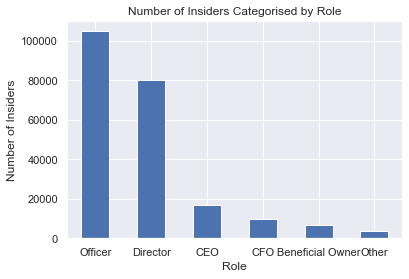

In [223]:
f, axes = plt.subplots(1, figsize = (6, 4))

ax = detail_data[['is_director', 'is_officer', 'is_ceo', 'is_cfo', 'is_beneficial_owner', 'is_other']].sum().sort_values(ascending=False).plot.bar(rot=0)
ax.set_xlabel("Role")
ax.set_ylabel("Number of Insiders")
ax.set_xticklabels(["Officer", "Director", "CEO", "CFO", "Beneficial Owner", "Other"]);
ax.set_title("Number of Insiders Categorised by Role");

As others are quite few and they are recategorised to CEO or CFO, they will not be inspected in the graphs below

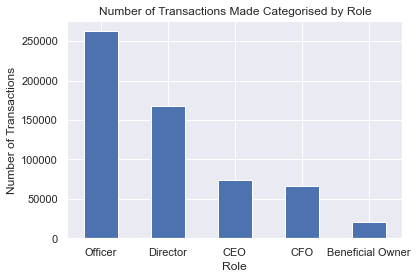

In [225]:
transaction_data = detail_data.merge(tx_data, on='accession_no')
ax = transaction_data[['is_director', 'is_officer', 'is_ceo', 'is_cfo', 'is_beneficial_owner']].sum().sort_values(ascending=False).plot.bar(rot=0)

ax.set_xlabel("Role")
ax.set_ylabel("Number of Transactions")
ax.set_xticklabels(["Officer", "Director", "CEO", "CFO", "Beneficial Owner"]);
ax.set_title("Number of Transactions Made Categorised by Role");

From the transaction type breakdown below, sale transactions (S) are the most, followed by exercise or conversion of derivative security (M), and then grant (A). Purchase transactions have lower coverage.

<AxesSubplot:>

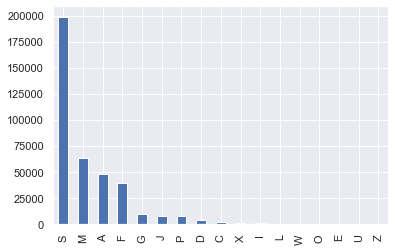

In [77]:
tx_data.code.value_counts().plot(kind = 'bar')

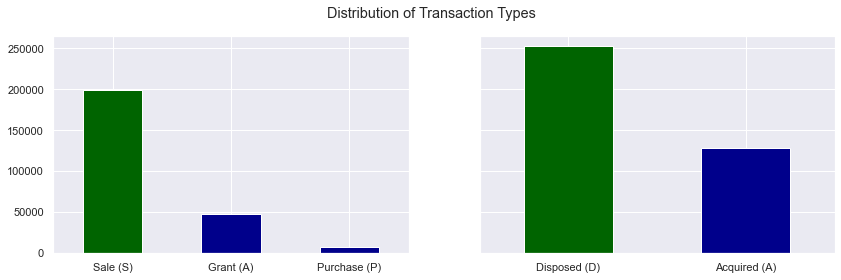

In [29]:
f, axes = plt.subplots(1, 2, figsize = (14, 4), sharey = True)

sale_buy_grant = tx_data.loc[(tx_data.code == 'S') | (tx_data.code == 'A') | (tx_data.code == 'P'), 'code']
sale_buy_grant.value_counts().plot(kind = 'bar', ax = axes[0], rot = 0, color = ['darkgreen', 'darkblue', 'darkblue'])
tx_data.acquired.value_counts().plot(kind = 'bar', ax = axes[1], rot = 0, color = ['darkgreen', 'darkblue'])

f.suptitle("Distribution of Transaction Types")
axes[0].set_xticklabels(['Sale (S)', 'Grant (A)', 'Purchase (P)'])
axes[1].set_xticklabels(['Disposed (D)', 'Acquired (A)']);

### Distribution of Number of Companies Having a Number of Insiders
Although only 150 S&P 500 companies are shown, the trend is similar to the benchmark. Fewer companies have more insiders. From the graph below, typically only one company has many insiders (from 20 to 100 insiders).

Findings: 
1. Companies typically have 35 to 70 insiders. However, less companies have more than 70 insiders. Most companies do not have just 1 or 2 insiders, possibly because these companies are listed on S&P500, and based on the company size, there should be at least 30 insiders who hold director or officer positions.

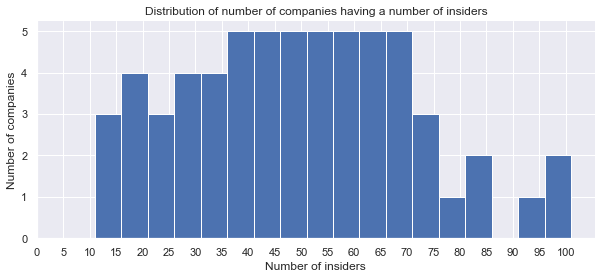

In [30]:
tx_group = detail_data.groupby(['CIK'])['reporter_cik'].nunique()
tx_distribution = tx_group.groupby(tx_group).count()
tx = pd.Series(tx_distribution.index.values, index = tx_distribution)
fig = plt.figure(figsize=(10, 4))
ax = plt.axes()
# ax.scatter(tx_distribution.index, tx_distribution.values, marker='o')
width = 5
n = math.ceil((tx.max() - tx.min())/width)
plt.hist(tx, bins = n)
ax.set_xticks(np.arange(0, tx.max(), 5))
ax.set_xlabel('Number of insiders')
ax.set_ylabel('Number of companies')
ax.set_title('Distribution of number of companies having a number of insiders')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [31]:
transaction_data = detail_data.reset_index().merge(tx_data, on='accession_no').sort_values(by = 'Date')
transaction_data.head()

,Date,Company,CIK_x,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,...,is_ceo,is_cfo,CIK_y,stock_type,code,acquired,shares_exchanged,net_shares_owned,stock_price,direct_ownership
0,2003-07-28,Ross Stores Inc,745732,https://www.sec.gov/Archives/edgar/data/745732...,ROST,117911003004240,4,Rentler Barbara,1238947,Senior VP,...,False,False,745732,COMMON STOCK,S,D,3500.0,62040.0,44.0000,D
14,2003-07-28,Fastenal Co,815556,https://www.sec.gov/Archives/edgar/data/815556...,FAST,117911003004229,4,Kierlin Robert A,901066,NaN,...,False,False,815556,Common Stock,X,D,20240.0,6586682.0,27.5000,D
12,2003-07-28,Williams Companies Inc,107263,https://www.sec.gov/Archives/edgar/data/107263...,WMB,120919103013969,4,Williams Companies Inc,107263,NaN,...,False,False,107263,Common Units,S,D,5100.0,2349691.0,12.1508,D
11,2003-07-28,Williams Companies Inc,107263,https://www.sec.gov/Archives/edgar/data/107263...,WMB,120919103013969,4,Williams Companies Inc,107263,NaN,...,False,False,107263,Common Units,S,D,5000.0,2354791.0,12.1000,D
10,2003-07-28,Danaher Corp De,313616,https://www.sec.gov/Archives/edgar/data/313616...,DHR,120525203000004,4,Ditkoff James H,1205252,Senior VP--Finance & Tax,...,False,False,313616,"Common stock, par value $.01 per share",D,D,5000.0,59959.0,70.4500,D


From the graph below, while purchases and grants remain relatively constant over the years, sales vary according to time. For instance, sale transactions peaked in late 2008, which coincides with the 2008 Financial Crisis. In the same year, Lehman Brothers bankrupted on 15th September 2008, sending repercussions across the globe. This crisis was reflected in the transactions below.    

One interesting finding is that the sale trend peaked before the bankruptcy of the Lehman Brothers. This might highlight the theory that stock markets reflect the economy quicker than the actual economy.

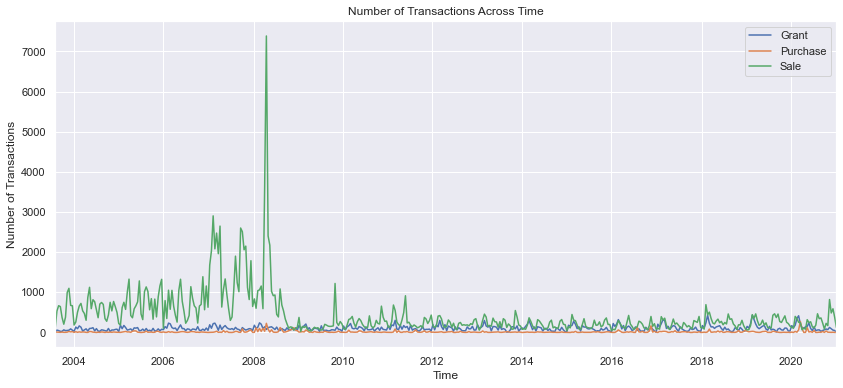

In [33]:
data = transaction_data.loc[(transaction_data.code == 'A') | (transaction_data.code == 'P') | (transaction_data.code == 'S'), ['Date', 'code', 'Company']]
data = data.groupby(['Date', 'code']).count().unstack().fillna(0)
f, axes = plt.subplots(figsize = (14, 6))
data.resample('2W').sum().plot(ax = axes)

# Plot configs
plt.title("Number of Transactions Across Time")
plt.ylabel("Number of Transactions")
plt.xlabel("Time")
plt.legend(["Grant", "Purchase", "Sale"]);
ax = plt.gca()
plt.show()

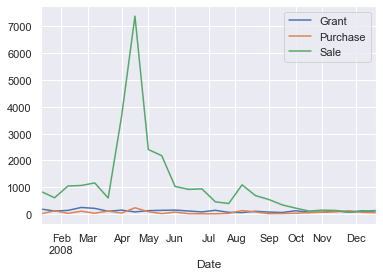

In [41]:
data.resample('2W').sum().loc['2008'].plot()
plt.legend(["Grant", "Purchase", "Sale"]);

### Time Series by Role Codes
Monthly visualisation is shown.  

Findings
1. Beneficial owners indeed have different behaviours than company insiders.. There is a spike after June 2008 (economic crisis), but the number of transactions remains low all the while compared to officers.
2. More officers' transactions than directors' transactions. This is aligned with the paper's explanation that there are more officers than directors
3. The transactions spiked regularly. This could be interpreted as routine transaction

[1741 1775 1879 1984 2088 2192 2297 2401 2506 2610 2663]


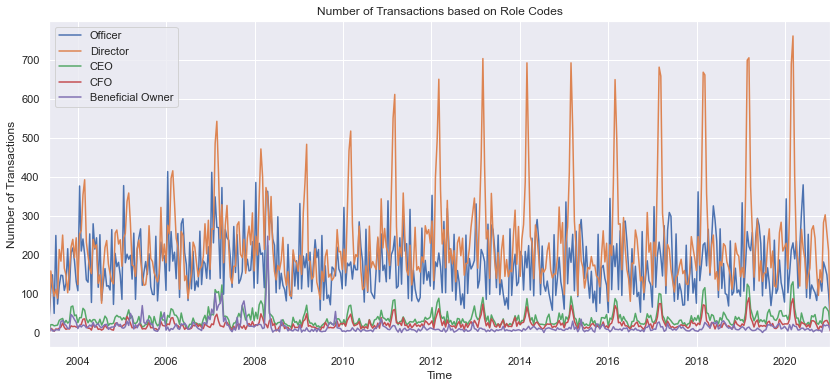

In [306]:
f, axes = plt.subplots(figsize = (14, 6))
df_role = detail_data[['is_director', 'is_officer', 'is_ceo', 'is_cfo', 'is_beneficial_owner']]
df_role.resample('2W').sum().plot(ax = axes)
plt.title("Number of Transactions based on Role Codes")
plt.ylabel("Number of Transactions")
plt.xlabel("Time")
plt.legend(["Officer", "Director", "CEO", "CFO", "Beneficial Owner"]);
ax = plt.gca()
# ax.xaxis.set_major_locator(plt.MultipleLocator(1))
print(ax.get_xticks())
plt.show()

<AxesSubplot:xlabel='Date'>

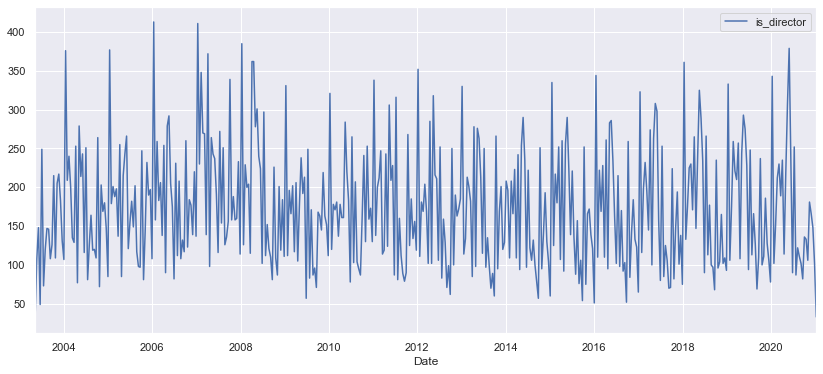

In [315]:
f, axes = plt.subplots(1, 1, figsize = (14, 6))
df_director = detail_data[['is_director']]
df_director.resample('2W').sum().plot(ax = axes)

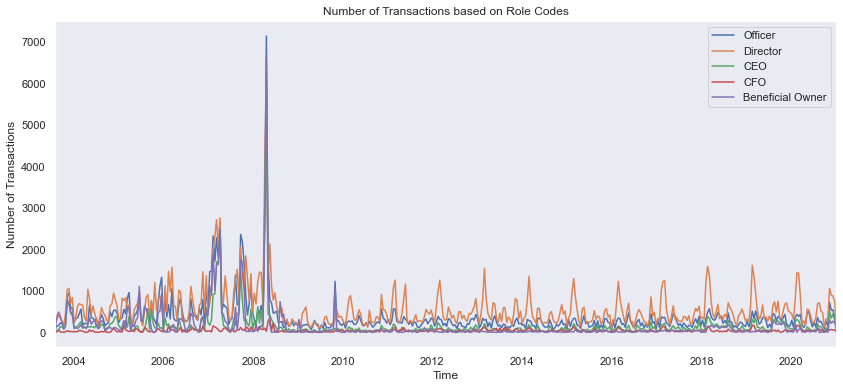

In [3]:
transaction_data = detail_data.reset_index().merge(tx_data, on='accession_no').set_index('Date')
df_role = transaction_data[['is_director', 'is_officer', 'is_ceo', 'is_cfo', 'is_beneficial_owner']]
f, axes = plt.subplots(figsize = (14, 6))
df_role.resample('2W').sum().plot(ax = axes)
plt.title("Number of Transactions based on Role Codes")
plt.ylabel("Number of Transactions")
plt.xlabel("Time")
plt.legend(["Officer", "Director", "CEO", "CFO", "Beneficial Owner"]);
ax = plt.gca()
# ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()
plt.show()

#### Purchase after Purchase, Sale after Sale
From the graphs below, transactions peaked every 90 days. This could be seen as there are 11 cycles within 1000 days. This is aligned with the Short Swing Profit Rule, which requires insiders who transacted within 90 days to disgorge any profit within the window. Hence, such cycle indicates that these insiders generally trade routinely instead of being based on information.

In [3]:
transaction_data = detail_data.reset_index().merge(tx_data, on='accession_no').sort_values(by = 'Date')
transaction_data = transaction_data.loc[(transaction_data.code == 'P') | (transaction_data.code == 'S'), :]

In [4]:
tx_after_tx = pd.DataFrame(columns = ['Day', 'tx_tx'])
for reporter, group in transaction_data.groupby('reporter_cik'):
    record = []
    dt = None
    tx_type_now = set()
    for index, row in group.iterrows():
        for prev in tx_type_now:
            record.append([pd.to_timedelta(row.Date - dt).days, prev + '-' + row.code])
        
        if dt != None and pd.to_timedelta(row.Date - dt).days == 0:
            tx_type_now.add(row.code)
        else:
            tx_type_now = set(row.code)
        dt = row.Date
        
    record = pd.DataFrame(record, columns = ['Day', 'tx_tx'])
    tx_after_tx = pd.concat([tx_after_tx, record], axis = 0, ignore_index = True)

In [32]:
print(f"Min: {tx_after_tx.Day.min()}\nMedian: {tx_after_tx.Day.median()}\n\
Max: {tx_after_tx.Day.max()}\n\
Mean: {tx_after_tx.Day.mean()}\n\
Standard Deviation: {tx_after_tx.Day.std()}\n\
Threshold for Outlier: {tx_after_tx.Day.mean() + 3*tx_after_tx.Day.std()}")

Min: 0
Median: 0.0
Max: 5702
Mean: 37.23554430528779
Standard Deviation: 167.9702802794348
Threshold for Outlier: 541.1463851435922


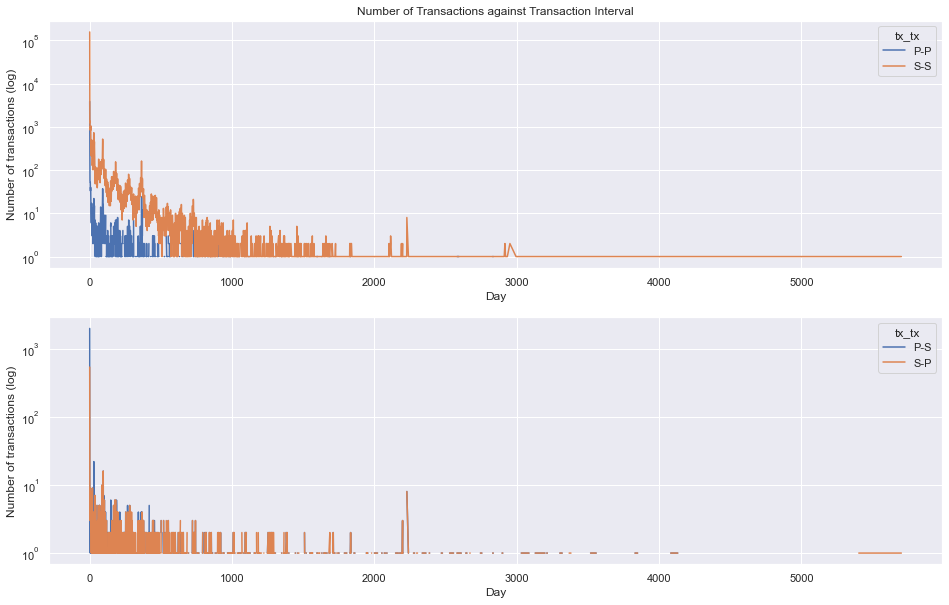

In [44]:
transactions = tx_after_tx.groupby('tx_tx')['Day'].value_counts().unstack().fillna(method = 'ffill').T
f, axes = plt.subplots(2, 1, figsize = (16, 10))
transactions[['P-P', 'S-S']].plot(ax = axes[0])
transactions[['P-S', 'S-P']].plot(ax = axes[1])
axes[0].set_title('Number of Transactions against Transaction Interval');
axes[0].set_yscale('log')
axes[0].set_ylabel('Number of transactions (log)');
axes[0].legend(['Purchase -> Purchase', 'Sale -> Sale'])
axes[1].set_yscale('log')
axes[1].set_ylabel('Number of transactions (log)');
axes[1].legend(['Purchase -> Sale', 'Sale -> Purchase'])

From the graph, the transactions are skewed heavily to the right. Based on the standard deviation, 
data points larger than $\mu+3\sigma$, 541 days are outliers.  
Additionally, there are only a few transactions that have a gap of more than 1000 days (at least 4 years). There should be no relationship between two transactions with 5-year hiatus.   
To compare with the reference paper, gap days that are less than 1000 days are inspected

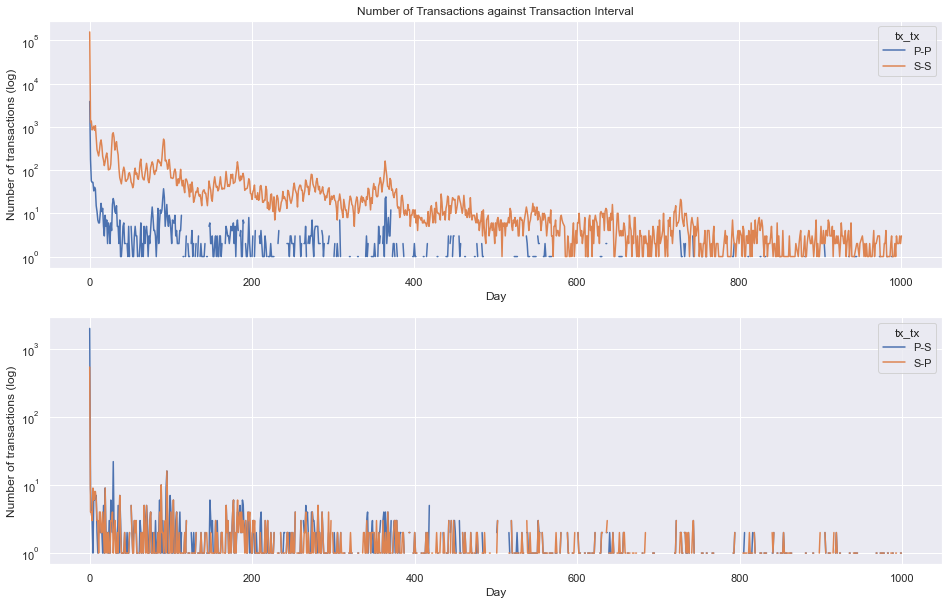

In [45]:
tx_1500_days_span = tx_after_tx[tx_after_tx.Day <= 1000]
transactions = tx_1500_days_span.groupby('tx_tx')['Day'].value_counts().unstack().fillna(method = 'ffill').T
f, axes = plt.subplots(2, 1, figsize = (16, 10))
transactions[['P-P', 'S-S']].plot(ax = axes[0])
transactions[['P-S', 'S-P']].plot(ax = axes[1])
axes[0].set_title('Number of Transactions against Transaction Interval');
axes[0].set_yscale('log')
axes[0].set_ylabel('Number of transactions (log)');
axes[0].legend(['Purchase -> Purchase', 'Sale -> Sale'])
axes[1].set_yscale('log')
axes[1].set_ylabel('Number of transactions (log)');
axes[1].legend(['Purchase -> Sale', 'Sale -> Purchase'])

#### Transaction Interval by Role Codes

In [47]:
transaction_data = detail_data.reset_index().merge(tx_data, on='accession_no').sort_values(by = 'Date')
transaction_data = transaction_data.loc[(transaction_data.code == 'P') | (transaction_data.code == 'S'), :]
transaction_data.head()

,Date,Company,CIK_x,Link,trad_symbol,accession_no,form,reporter_name,reporter_cik,reporter_title,...,is_ceo,is_cfo,CIK_y,stock_type,code,acquired,shares_exchanged,net_shares_owned,stock_price,direct_ownership
0,2003-07-28,Ross Stores Inc,745732,https://www.sec.gov/Archives/edgar/data/745732...,ROST,117911003004240,4,Rentler Barbara,1238947,Senior VP,...,False,False,745732,COMMON STOCK,S,D,3500.0,62040.0,44.0000,D
12,2003-07-28,Williams Companies Inc,107263,https://www.sec.gov/Archives/edgar/data/107263...,WMB,120919103013969,4,Williams Companies Inc,107263,NaN,...,False,False,107263,Common Units,S,D,5100.0,2349691.0,12.1508,D
11,2003-07-28,Williams Companies Inc,107263,https://www.sec.gov/Archives/edgar/data/107263...,WMB,120919103013969,4,Williams Companies Inc,107263,NaN,...,False,False,107263,Common Units,S,D,5000.0,2354791.0,12.1000,D
5,2003-07-28,Nvr Inc,906163,https://www.sec.gov/Archives/edgar/data/906163...,NVR,90616303000016,4,Schar Dwight C,1212710,Chairman of the Board and CEO,...,True,False,906163,"NVR, Inc. common stock",S,D,40300.0,741798.0,397.0670,D
4,2003-07-28,Nvr Inc,906163,https://www.sec.gov/Archives/edgar/data/906163...,NVR,90616303000016,4,Schar Dwight C,1212710,Chairman of the Board and CEO,...,True,False,906163,"NVR, Inc. common stock",S,D,10000.0,782098.0,406.5692,D


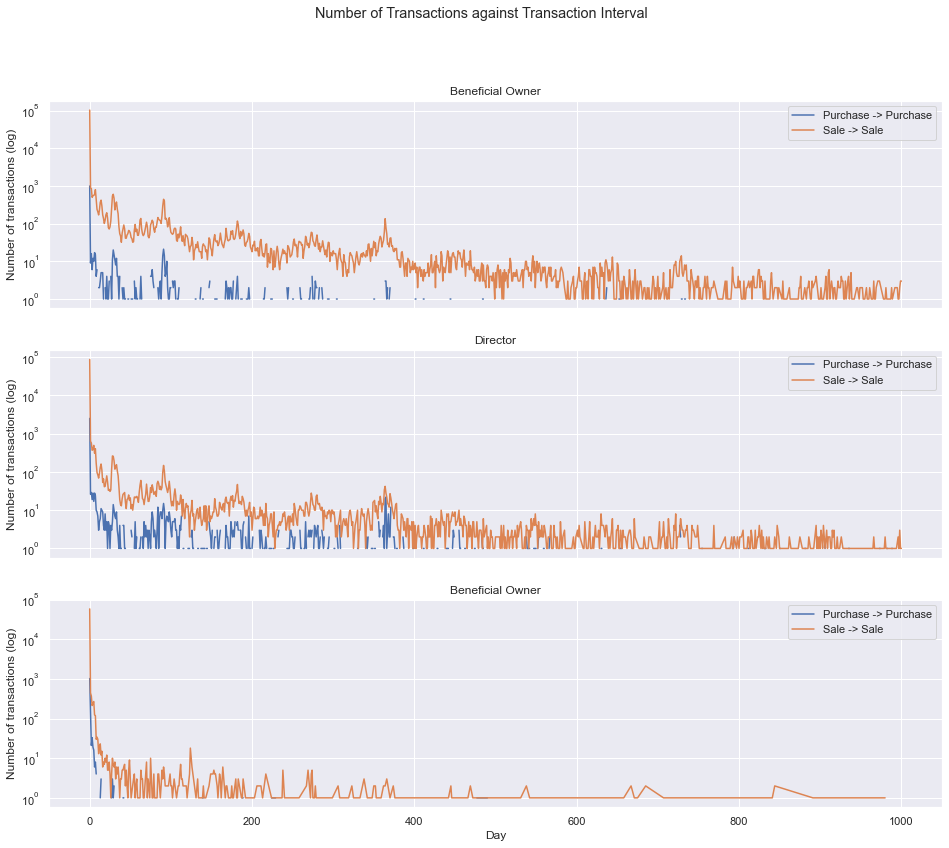

In [51]:
dimensions = ['is_officer', 'is_director', 'is_beneficial_owner']
f, axes = plt.subplots(3, 1, figsize = (16, 13), sharex = True)
f.suptitle('Number of Transactions against Transaction Interval');
for i, role in enumerate(dimensions):
    tx_after_tx = pd.DataFrame(columns = ['Day', 'tx_tx'])
    data = transaction_data[transaction_data[role] == True]
    for reporter, group in data.groupby('reporter_cik'):
        record = []
        dt = None
        tx_type_now = set()
        for index, row in group.iterrows():
            for prev in tx_type_now:
                record.append([pd.to_timedelta(row.Date - dt).days, prev + '-' + row.code])

            if dt != None and pd.to_timedelta(row.Date - dt).days == 0:
                tx_type_now.add(row.code)
            else:
                tx_type_now = set(row.code)
            dt = row.Date

        record = pd.DataFrame(record, columns = ['Day', 'tx_tx'])
        tx_after_tx = pd.concat([tx_after_tx, record], axis = 0, ignore_index = True)
    
    # plot graphs
    tx_1500_days_span = tx_after_tx[tx_after_tx.Day <= 1000]
    transactions = tx_1500_days_span.groupby('tx_tx')['Day'].value_counts().unstack().fillna(method = 'ffill').T
    transactions[['P-P', 'S-S']].plot(ax = axes[i])
    axes[i].set_yscale('log')
    axes[i].set_ylabel('Number of transactions (log)');
    axes[i].legend(['Purchase -> Purchase', 'Sale -> Sale'])
    
    if role == 'is_officer':
        axes[i].set_title('Officer')
    if role == 'is_director':
        axes[i].set_title('Director')
    else:
        axes[i].set_title('Beneficial Owner')